In [1]:
import os 

In [2]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_location = "..\data"
train_data_location_name = f"{file_location}\Training.csv"
test_data_location_name = f"{file_location}\Testing.csv"


In [4]:
# Load the data 
# We're loading both training and testing data to see what we have to work with

# Load Train Data
train_data = pd.read_csv(train_data_location_name)
print(train_data.shape)
# Load Test Data
test_data = pd.read_csv(test_data_location_name)
print(test_data.shape)

(4920, 134)
(42, 133)


In [5]:
# Lets visually explore the data
train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [6]:
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [7]:
# Data Cleaning

# Schema Change
train_data.drop('Unnamed: 133', axis=1, inplace=True) 
train_data["prognosis"].str.strip()
train_data.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
# Combine the dataset because test has only one record which is pretty much useless
union_df_reset_index = pd.concat([train_data, test_data], ignore_index=True)

In [9]:
# Remove the trailing whitespaces
union_df_reset_index["prognosis"] = union_df_reset_index["prognosis"].str.strip()

# Filter for the specific data
filtered = union_df_reset_index[union_df_reset_index['prognosis'].isin(['Heart attack', 'Tuberculosis', 'Pneumonia','GERD'])].copy()

# Check out the shape of the dataframe
print(f"Train data shape{filtered.shape}")

Train data shape(484, 133)


In [10]:
# Import statistical models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV

In [11]:
# We already have the feature columns in heart_attack_feature_columns
features = [col for col in filtered.columns if col != 'prognosis']

# Instead of excluding models, lets keep all of those features

# --- Prepare X and y for modeling ---
X = filtered[features]
y = filtered['prognosis']



In [ ]:
# Encode labels
label_encoder= LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [13]:
# stratify=y_encoded ensures class proportions are maintained in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nPrognosis distribution in training set:")
train_prognosis_counts = pd.Series(y_train).map(lambda x: label_encoder.inverse_transform([x])[0]).value_counts(normalize=True)
print(train_prognosis_counts)

print("\nPrognosis distribution in test set:")
test_prognosis_counts = pd.Series(y_test).map(lambda x: label_encoder.inverse_transform([x])[0]).value_counts(normalize=True)
print(test_prognosis_counts)

Shape of X_train: (387, 132)
Shape of X_test: (97, 132)
Shape of y_train: (387,)
Shape of y_test: (97,)

Prognosis distribution in training set:
Tuberculosis    0.250646
Heart attack    0.250646
GERD            0.250646
Pneumonia       0.248062
Name: proportion, dtype: float64

Prognosis distribution in test set:
Pneumonia       0.257732
GERD            0.247423
Tuberculosis    0.247423
Heart attack    0.247423
Name: proportion, dtype: float64


In [14]:
# Remove all the columns that have all 0s, to avoid complexity and removing dimensions that are of no use. 

all_zero_cols_in_train_fold = X_train.columns[(X_train == 0).all()].tolist()

In [15]:
if all_zero_cols_in_train_fold:
# Remove these columns from both X_train_processed_fold and X_test_processed_fold
    X_train_final_fold = X_train.drop(columns=all_zero_cols_in_train_fold)
    X_test_final_fold = X_test.drop(columns=all_zero_cols_in_train_fold)
else:
    X_train_final_fold = X_train
    X_test_final_fold = X_test

In [16]:
# Now lets train a multi-class Logistic Regression model
# 'multi_class='ovr'' (one-vs-rest) trains a binary classifier for each class.
# This allows us to inspect coefficients for each class against all others.
# 'solver='liblinear'' is good for smaller datasets and binary features.
# 'class_weight='balanced'' helps with potential class imbalance.
model = LogisticRegression(
    multi_class='ovr', 
    solver='liblinear', 
    random_state=42, 
    class_weight='balanced', 
    max_iter=1000)

print("Training Logistic Regression Model")
model.fit(X, y_encoded)
print("Logistic Regression training complete!")
model


Training Logistic Regression Model
Logistic Regression training complete!


LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='ovr',
                   random_state=42, solver='liblinear')

In [17]:
# Define the cross-validation strategy
# StratifiedKFold ensures each fold has the same proportion of classes as the full dataset.
cv_strategy = StratifiedKFold(
    n_splits=5, 
    shuffle=True, 
    random_state=42)

In [18]:
# Define scoring metrics for multi-class classification
scoring = {
    'accuracy': 'accuracy',
    'precision_weighted': 'precision_weighted',
    'recall_weighted': 'recall_weighted',
    'f1_weighted': 'f1_weighted'
}

In [19]:
# Perform cross-validation
print("Performing 5-Fold Stratified Cross-Validation...")
cv_results = cross_validate(
    estimator=model,
    X=X_train_final_fold,        # Use the fully preprocessed features
    y=y_train,      # Use the encoded target
    cv=cv_strategy,
    scoring=scoring,
    return_train_score=False # We usually only care about test scores for evaluation
)

Performing 5-Fold Stratified Cross-Validation...


In [20]:
# Convert results to a DataFrame for easy viewing
cv_results_df = pd.DataFrame(cv_results)

In [21]:
# Print the cross validation results 
print("\nCross-Validation Results per Fold:")
print(cv_results_df)


Cross-Validation Results per Fold:
   fit_time  score_time  test_accuracy  test_precision_weighted  \
0  0.004998    0.033999            1.0                      1.0   
1  0.003001    0.006999            1.0                      1.0   
2  0.004000    0.005000            1.0                      1.0   
3  0.003001    0.006000            1.0                      1.0   
4  0.006004    0.009999            1.0                      1.0   

   test_recall_weighted  test_f1_weighted  
0                   1.0               1.0  
1                   1.0               1.0  
2                   1.0               1.0  
3                   1.0               1.0  
4                   1.0               1.0  


In [22]:
# Calculate mean and standard error of the mean (SEM) for each metric
cv_metrics_summary = cv_results_df.agg(['mean', 'sem'])

In [23]:
# y_pred will be numerical (encoded labels)
y_pred = model.predict(X_test)

In [24]:
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred) # y_pred from model.predict is always numerical

In [25]:
# Measuring Accuracy of the Model
# Accuracy Score
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"\nAccuracy Score: {accuracy:.4f}")


Accuracy Score: 1.0000


In [26]:
# 2. Confusion Matrix
# Ensure labels are in the correct order for the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)
print("\nConfusion Matrix:")
# Display with row/column labels for better understanding
conf_matrix_df = pd.DataFrame(conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)
print(conf_matrix_df)


Confusion Matrix:
              GERD  Heart attack  Pneumonia  Tuberculosis
GERD            24             0          0             0
Heart attack     0            24          0             0
Pneumonia        0             0         25             0
Tuberculosis     0             0          0            24


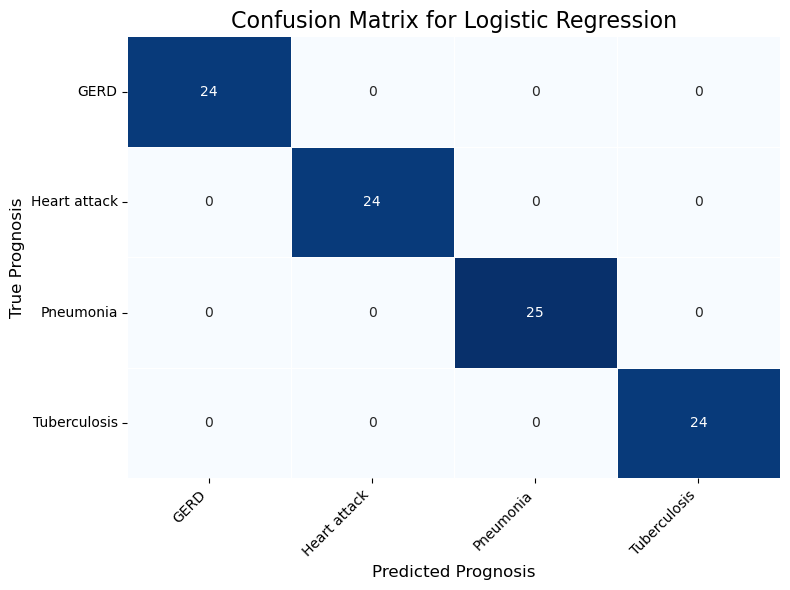

In [27]:
# Visualize Confusion Matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=.5)
plt.title('Confusion Matrix for Logistic Regression', fontsize=16)
plt.xlabel('Predicted Prognosis', fontsize=12)
plt.ylabel('True Prognosis', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [28]:
# Lets obtain the feature names and class names
feature_names = X.columns
class_names = label_encoder.classes_

In [29]:
# Lets now create a DataFrame to store coefficients for better interpretation
coef_df = pd.DataFrame(model.coef_.T, columns=class_names, index=feature_names)

In [30]:
print(coef_df.loc['chest_pain'])

GERD           -0.484000
Heart attack    0.284740
Pneumonia      -1.036747
Tuberculosis   -1.357229
Name: chest_pain, dtype: float64


In [31]:
# Lets find the important symptom coefficient for each

coefficient_threshold = 0.40

for prognosis_name in class_names:
    # Select the column for the current prognosis
    prognosis_coefficients = coef_df[prognosis_name]

    # Filter symptoms where the absolute coefficient value is greater than the threshold
    significant_symptoms_for_prognosis = prognosis_coefficients[
        prognosis_coefficients.abs() > coefficient_threshold
    ].sort_values(key=abs, ascending=False) # Sort by absolute value descending

    print(f"\n--- Prognosis: {prognosis_name} ---")
    if not significant_symptoms_for_prognosis.empty:
        print(significant_symptoms_for_prognosis)
    else:
        print(f"No symptoms found with absolute coefficient > {coefficient_threshold:.2f} for {prognosis_name}.")


--- Prognosis: GERD ---
breathlessness     -1.811085
sweating           -1.811085
stomach_pain        1.688864
acidity             1.513051
ulcers_on_tongue    1.513051
cough               1.275705
chest_pain         -0.484000
malaise            -0.483987
phlegm             -0.483987
chills             -0.475035
fatigue            -0.475035
high_fever         -0.475035
Name: GERD, dtype: float64

--- Prognosis: Heart attack ---
cough                 -2.192348
stomach_pain          -1.492468
acidity               -1.358508
ulcers_on_tongue      -1.358508
sweating               1.349363
breathlessness         1.349363
phlegm                -1.104008
malaise               -1.104008
chills                -1.066870
high_fever            -1.066870
fatigue               -1.066870
vomiting               0.752192
fast_heart_rate       -0.727286
rusty_sputum          -0.727286
loss_of_appetite      -0.436968
mild_fever            -0.436968
yellowing_of_eyes     -0.436968
swelled_lymph_nodes   -

In [32]:
# Visualize Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

        GERD       1.00      1.00      1.00        24
Heart attack       1.00      1.00      1.00        24
   Pneumonia       1.00      1.00      1.00        25
Tuberculosis       1.00      1.00      1.00        24

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



## Reflection and Analysis ##

**How Logistic Regression Works:**

Logistic Regression is a linear model used for binary or multi-class classification. It estimates the probability that an instance belongs to a particular class by fitting a sigmoid function to a linear combination of features. 

For multi-class (like our 'one-vs-rest' approach), it essentially draws linear decision boundaries to separate each class from the others.

**Why the Score Could Be 100%:**

- It is most likely that the dataset is linearly separable, meaning there exists a straight line (or hyperplane in higher dimensions) that can perfectly divide the data points belonging to one prognosis from all others, then Logistic Regression will find that line and achieve 100% accuracy. 

- The fact that it achieved perfection suggests that for each of our four prognoses, there's a clear, linear combination of symptoms that distinguishes it from the rest, with no overlap or ambiguity in the feature space. 

- This is a very strong characteristic of our data.

**Potential Considerations:**

- Examine Coefficients Closely: Revisiting the logistic regression coefficients. Looking for symptoms with very large positive or negative coefficients for specific prognoses. These are the symptoms that form the "perfect linear separator." For example, 'sweating' and 'breathlessness'has a huge positive coefficient for 'Heart attack' and near-zero or negative for others, and 'swelled lymph nodes' has a huge positive for 'Tuberculosis' and near-zero or negatie for others, that's our explanation.

- Feature Interaction: Furthremore, even if no single symptom perfectly separates, a simple linear combination might. For instance, (chest_pain + sweating - cough) might perfectly separate 'Heart attack' from others.

- Data Validation: Given the linear separability, it's crucial to understand why our real-world data is so clean. Is there a specific data collection protocol or a very narrow patient cohort that minimizes symptom overlap?